#This code use logistic regression to predict breast cancer

#### **Data Loading and Analysis**
Load the sklearn breast cancer dataset and perform an exploratory data analysis. You should briefly comment on your results.


Load the breast cancer dataset and perform an exploratory analysis.

Returns:
X -- feature matrix
y -- vector of labels
data_description -- statistical description of the data

In [9]:
# 1. Load the data set
# 2. Extract X and y
# 3. Perform an analysis


# Load the dataset
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


data = load_breast_cancer()
X = data.data
y = data.target
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Exploratory analysis
df.head(9).T #Se empieza a mirar los datos


,0,1,2,3,4,5,6,7,8
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000,12.450000,18.250000,13.710000,13.000000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000,15.700000,19.980000,20.830000,21.820000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000,82.570000,119.600000,90.200000,87.500000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000,477.100000,1040.000000,577.900000,519.800000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300,0.127800,0.094630,0.118900,0.127300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800,0.170000,0.109000,0.164500,0.193200
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000,0.157800,0.112700,0.093660,0.185900
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300,0.080890,0.074000,0.059850,0.093530
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900,0.208700,0.179400,0.219600,0.235000
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830,0.076130,0.057420,0.074510,0.073890


In [10]:
df.info() #General information of the variable type is requested

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.describe().T #To see the mean, variance, and relevant metrics.

# Comment on the results:
# you can see that in the dataframe table the errors tend to be larger in:
  # mean of: area, texture, perimeter
  # error del: area, perimeter
  # worst del: area, perimeter, radius, texture



,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


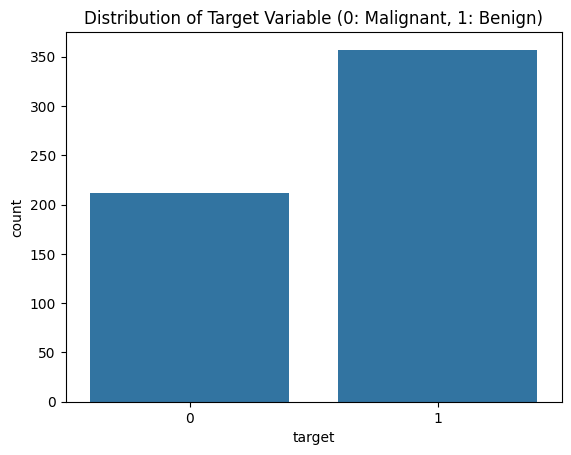

target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


In [12]:
# Visualization of class distribution
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: Malignant, 1: Benign)')
plt.show()

#printing percentages
target_counts = df['target'].value_counts(normalize=True) * 100
print(target_counts)


In [13]:
# Correlation Matrix
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
masked_corr_matrix = corr_matrix.mask(mask)
fig = px.imshow(masked_corr_matrix,
                color_continuous_scale='RdBu_r',
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                title='Correlation Matrix')

fig.update_layout(
    height=800,
    width=800,
    title_font=dict(size=20),
    xaxis_tickangle=-45,
    yaxis_tickangle=0
)

fig.show()


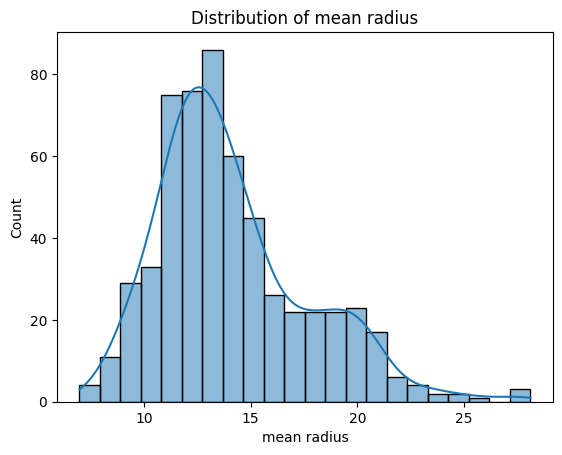

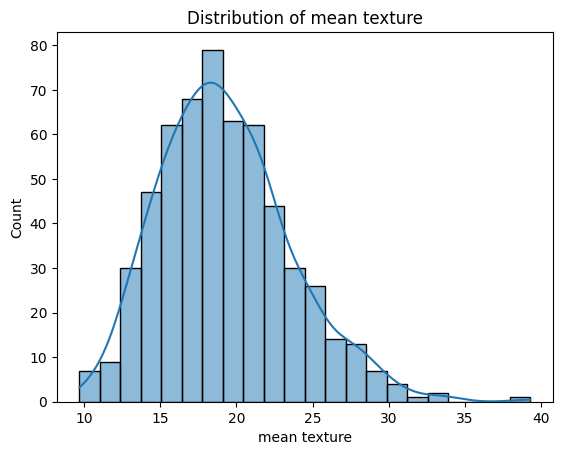

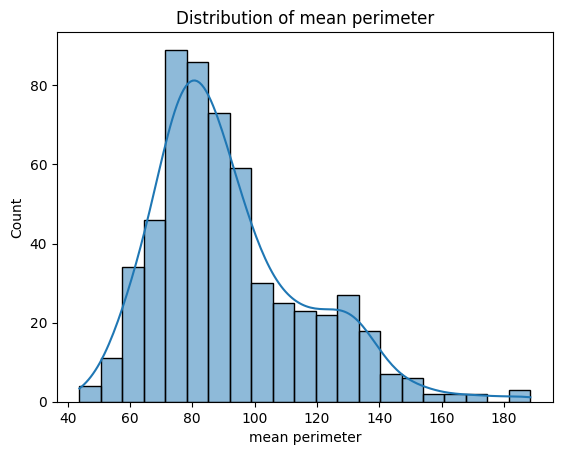

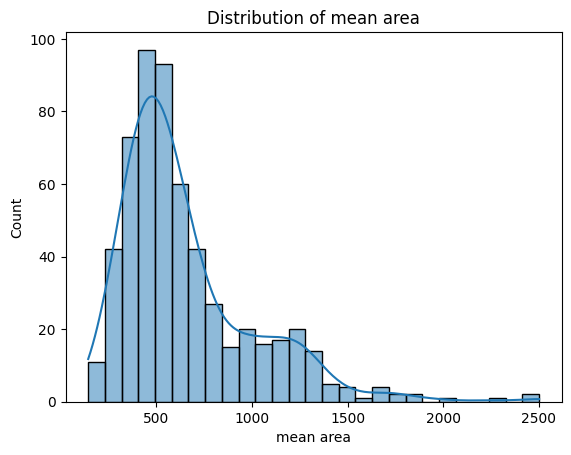

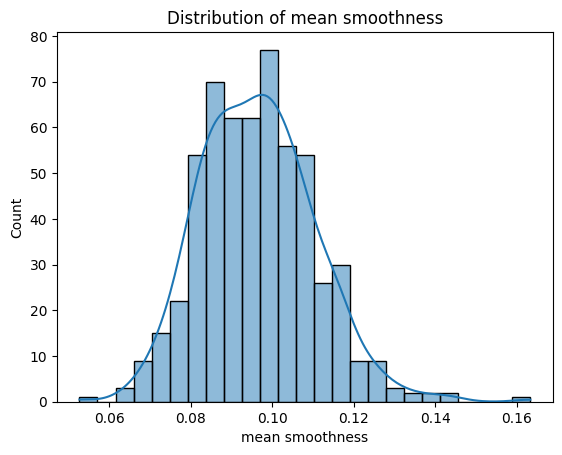

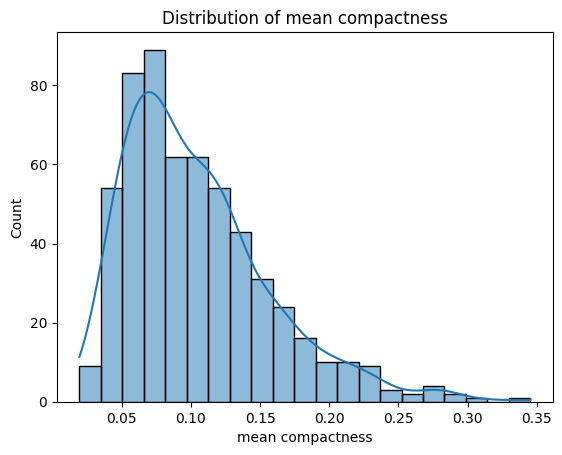

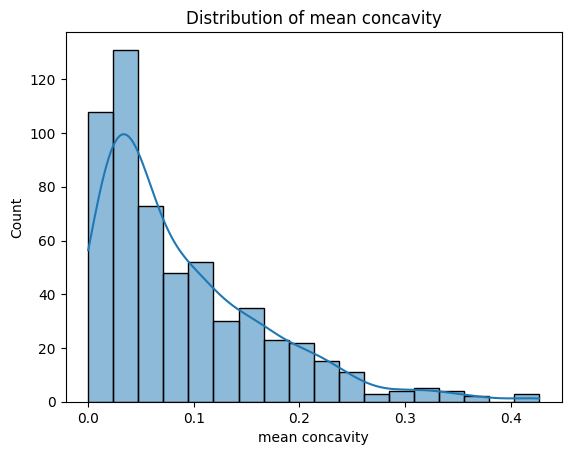

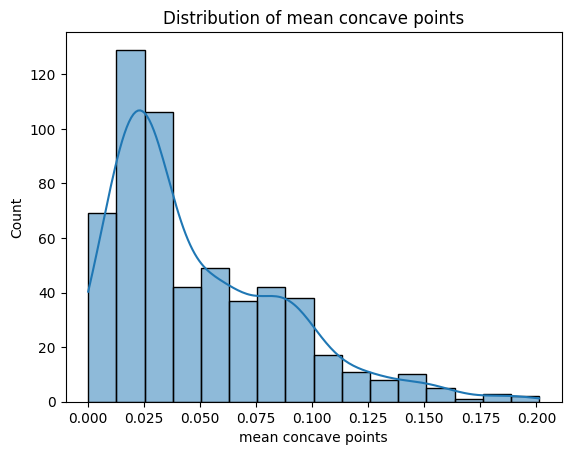

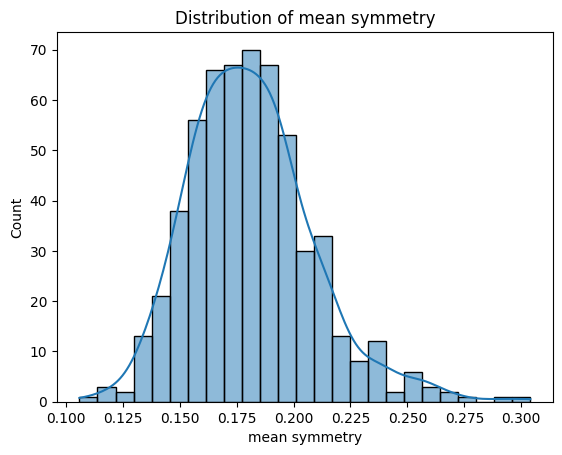

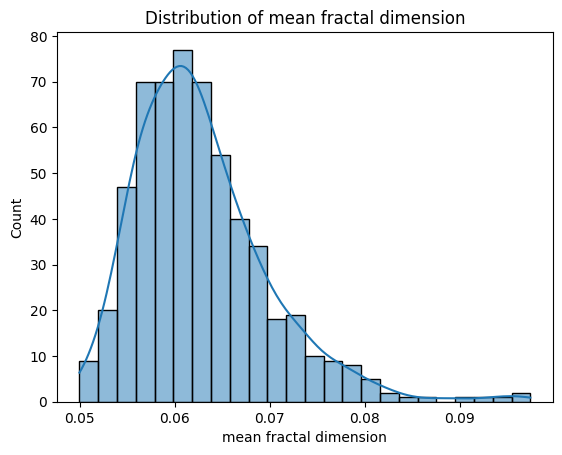

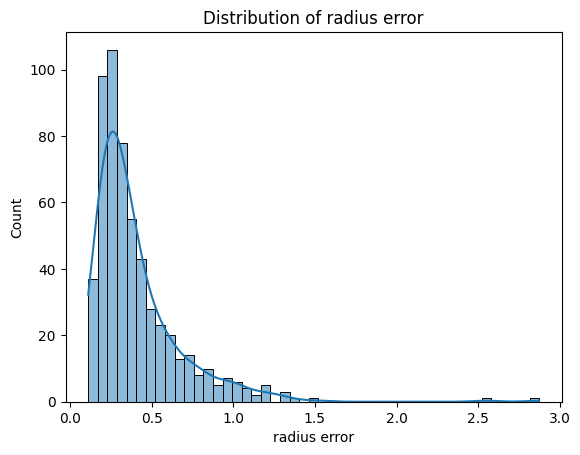

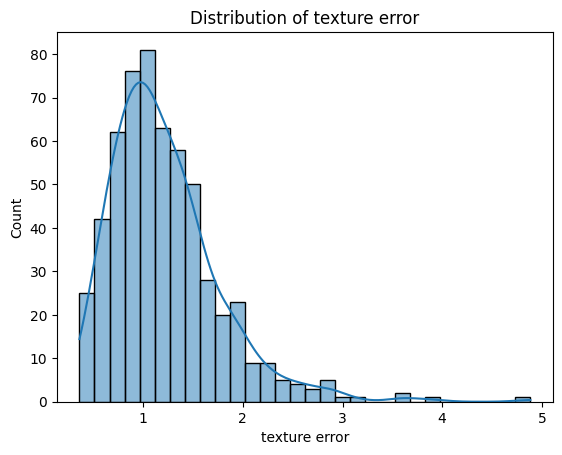

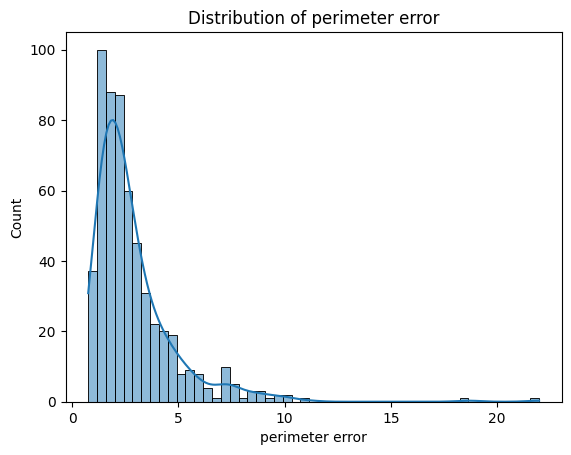

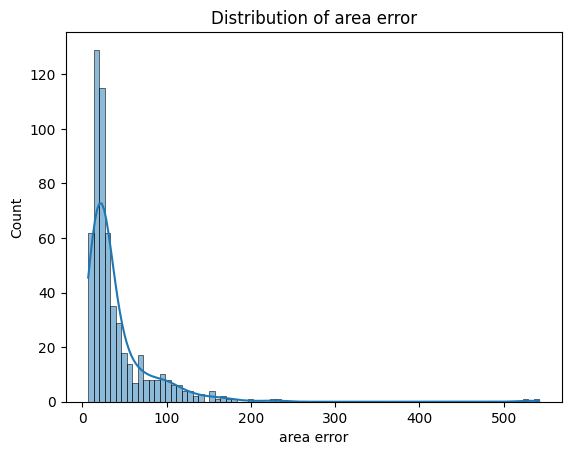

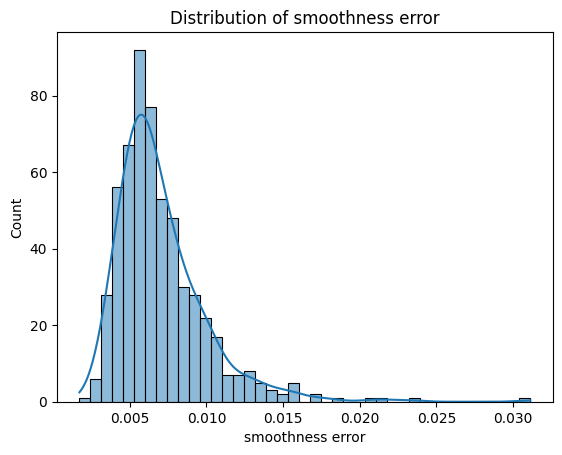

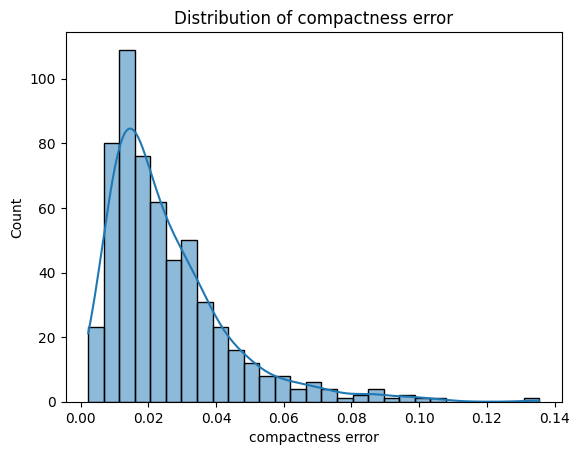

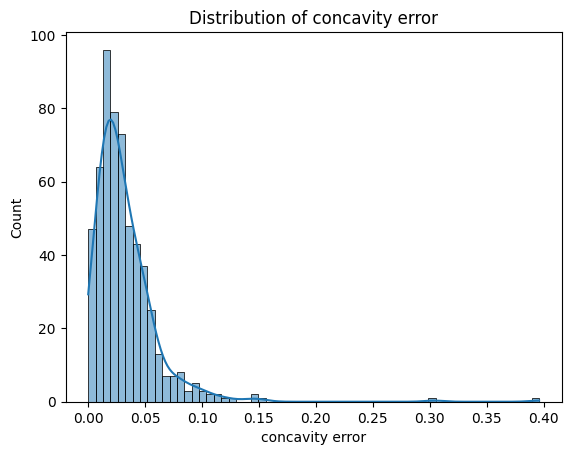

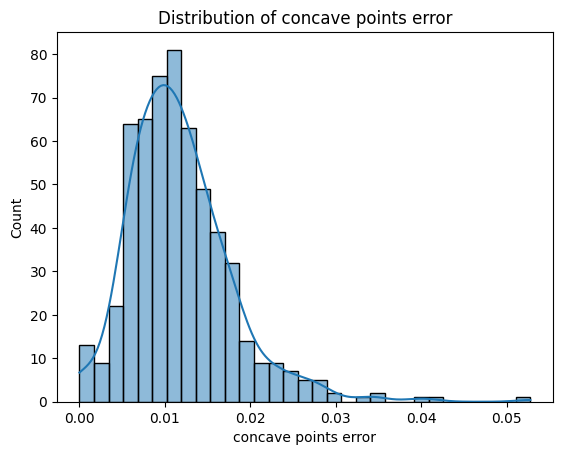

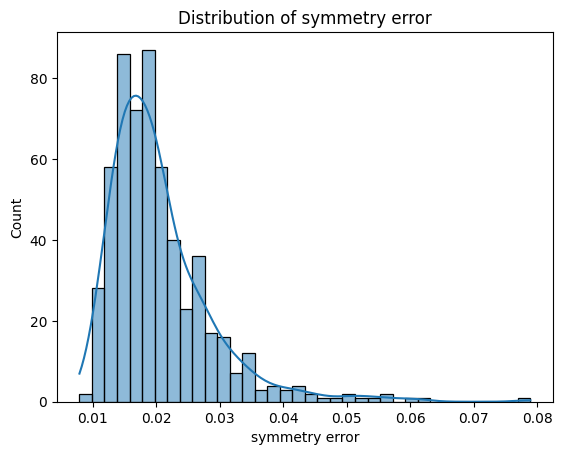

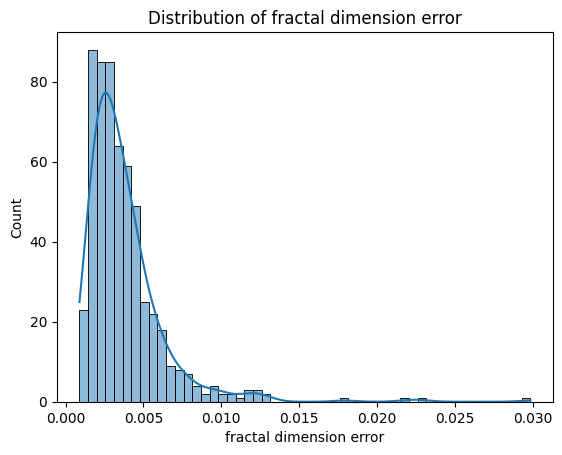

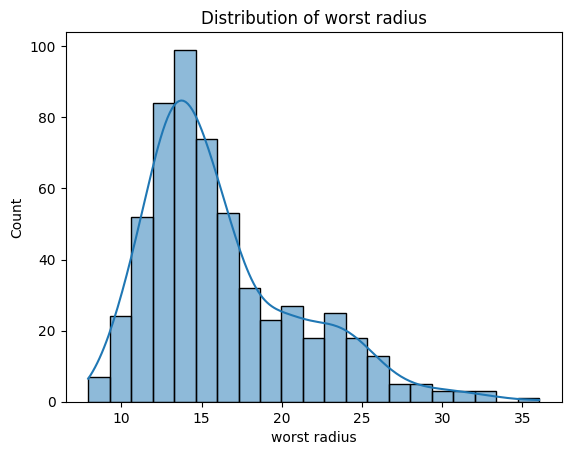

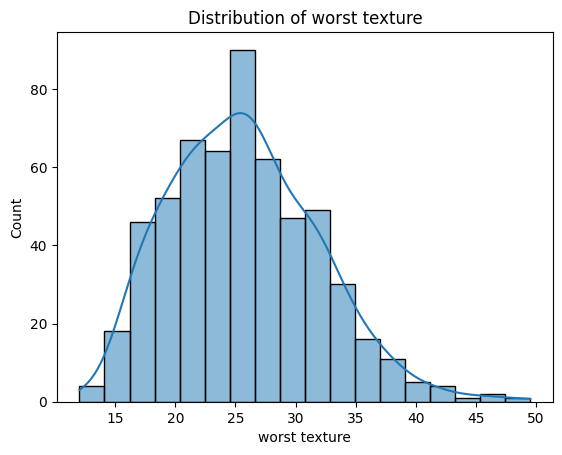

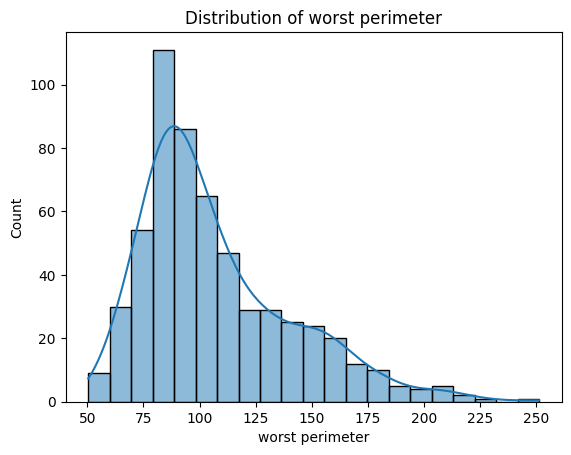

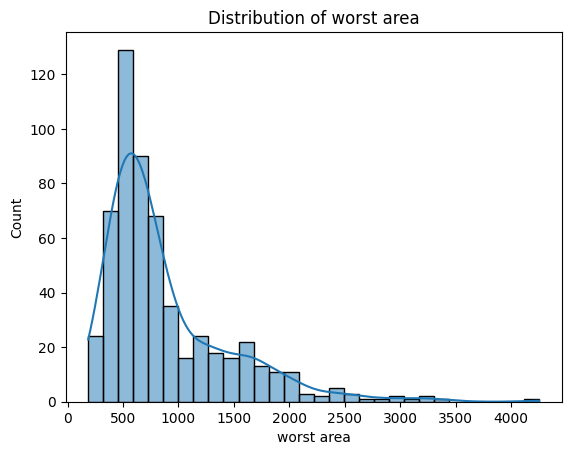

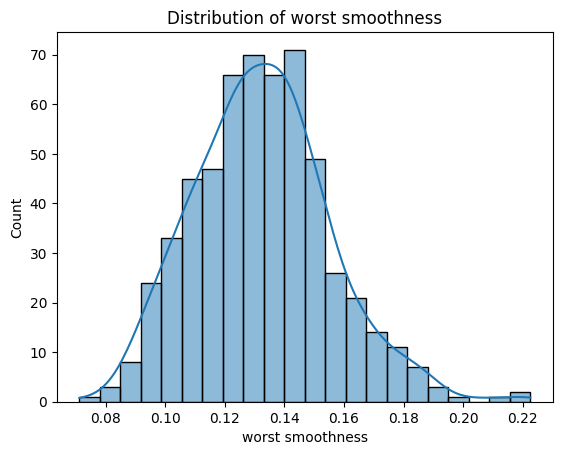

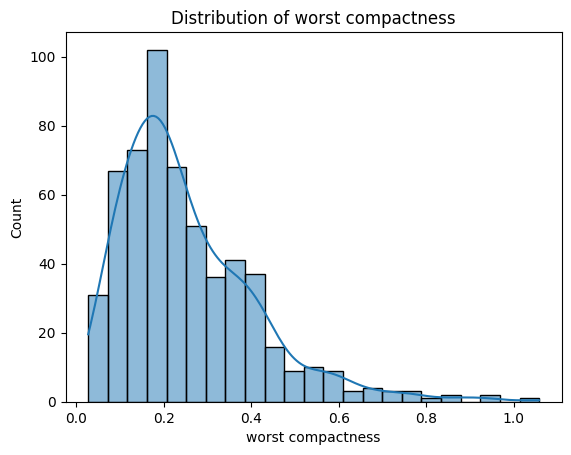

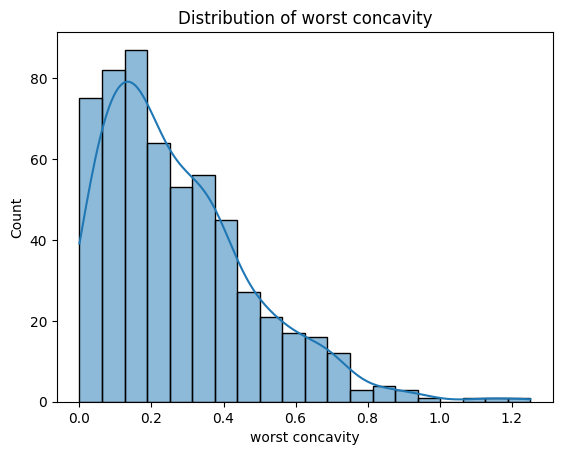

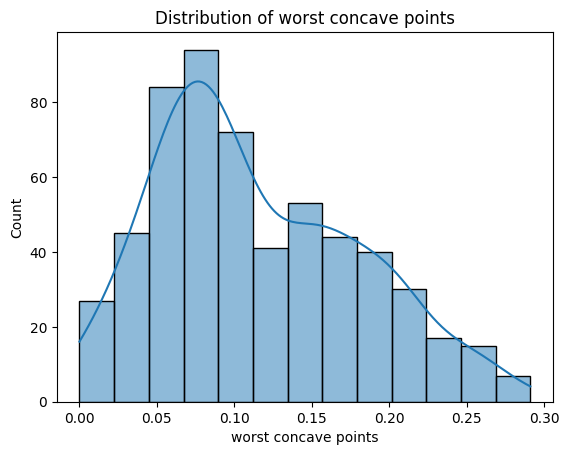

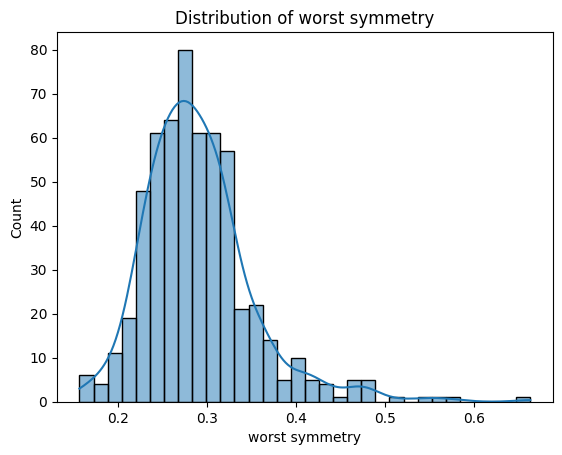

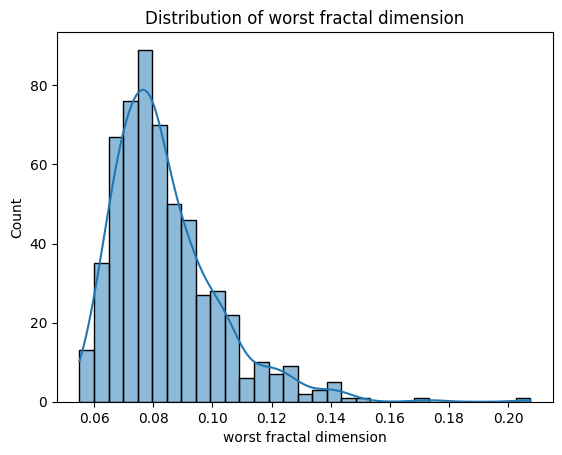

In [14]:
# Analysis of characteristics

# You can see the distributions of symmetry, concavity...
for feature in df.columns[:-1]:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


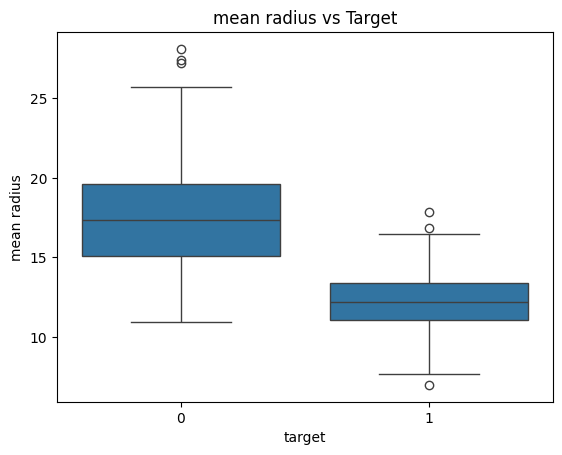

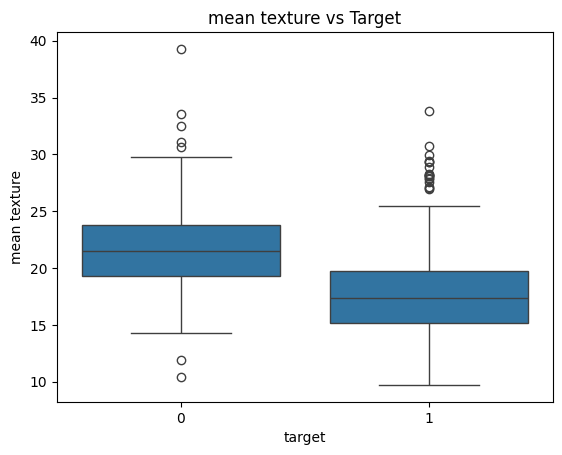

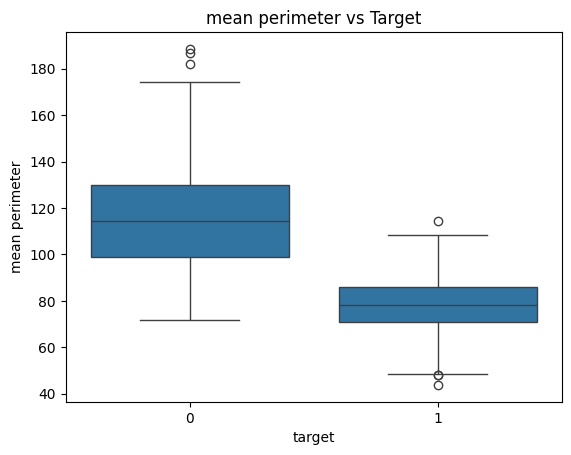

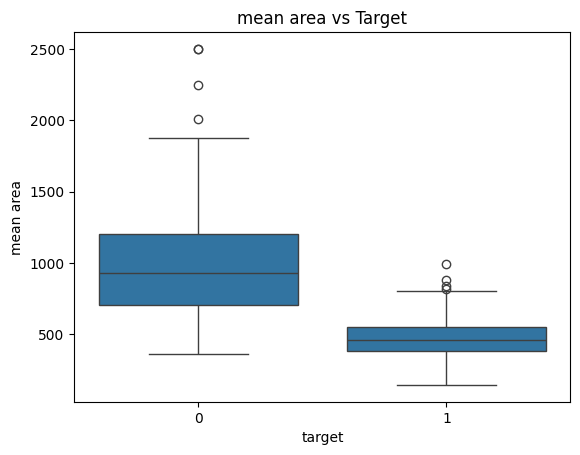

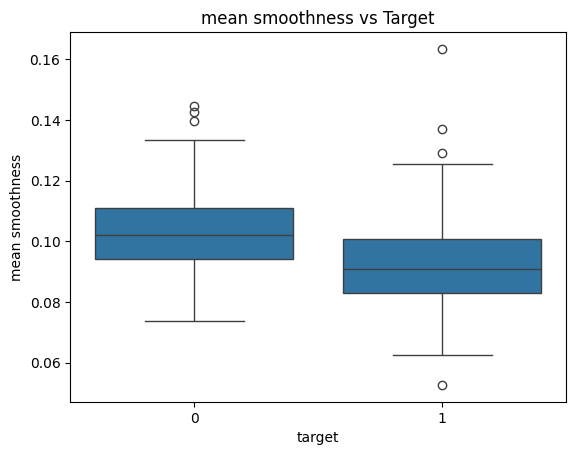

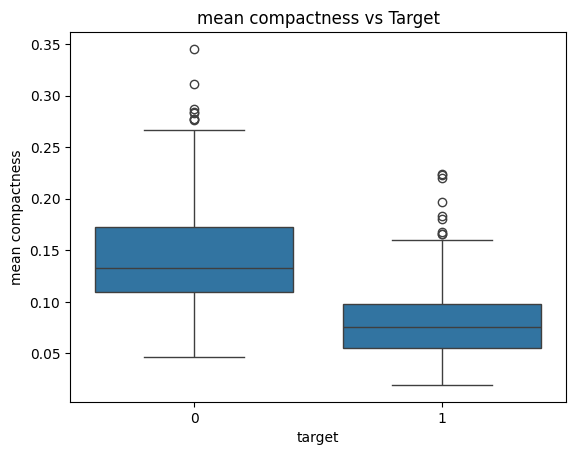

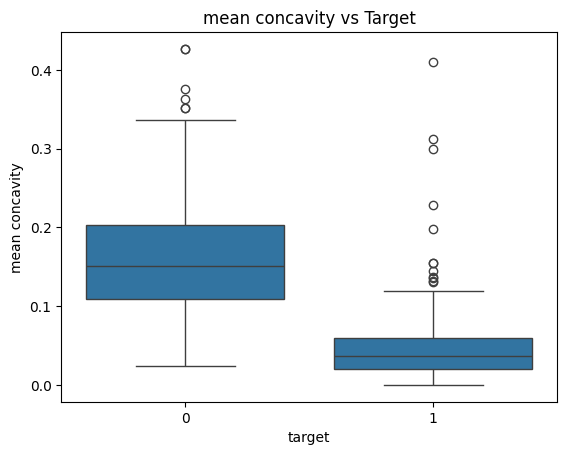

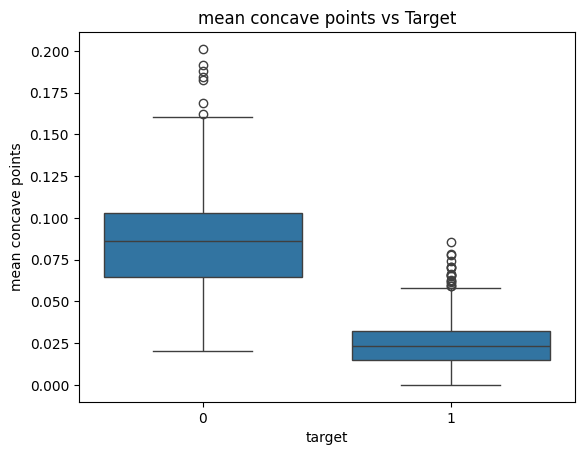

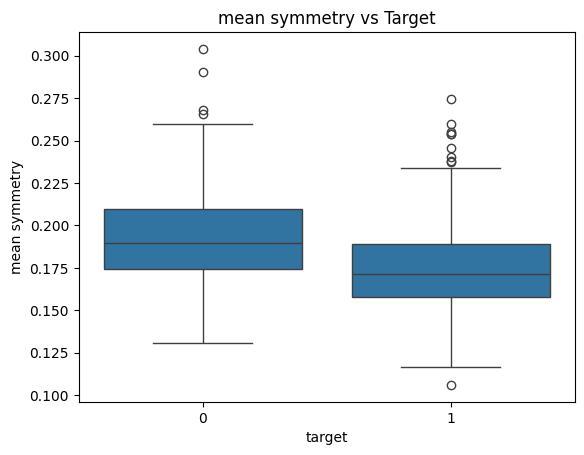

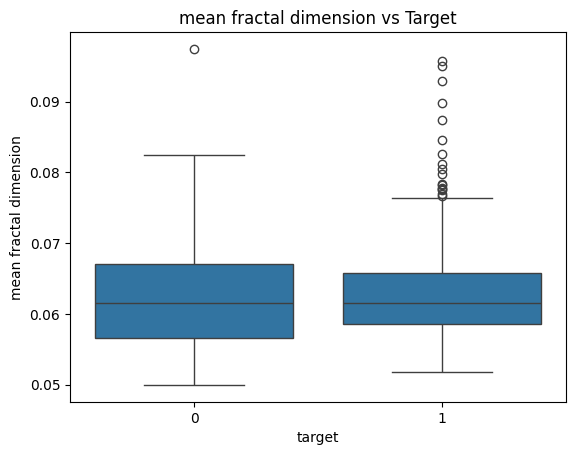

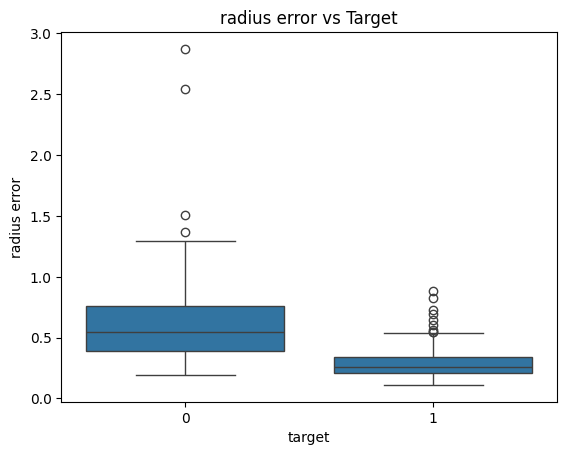

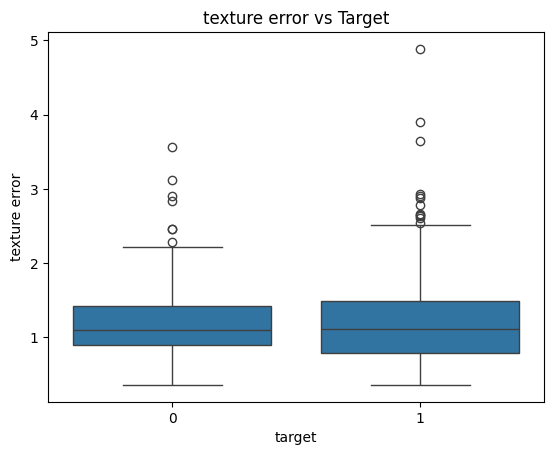

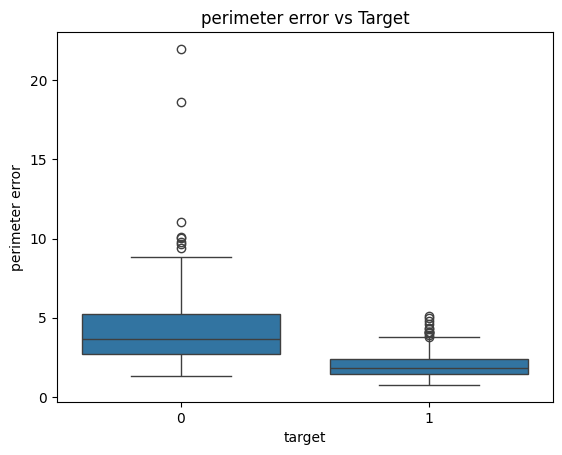

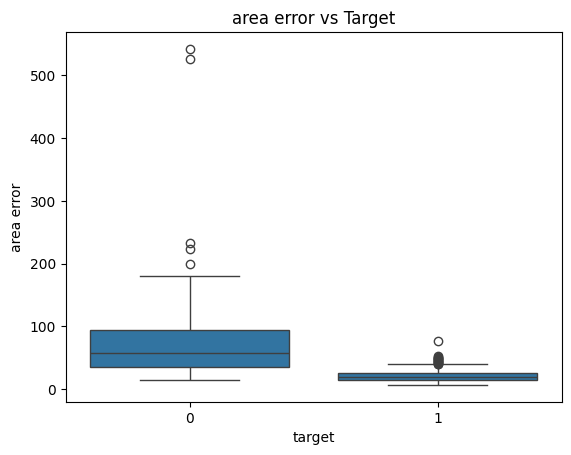

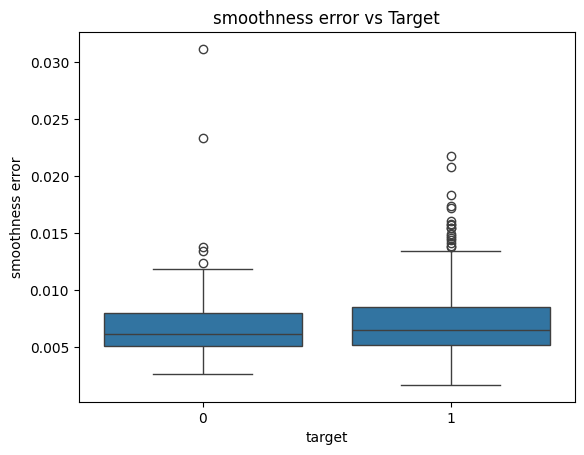

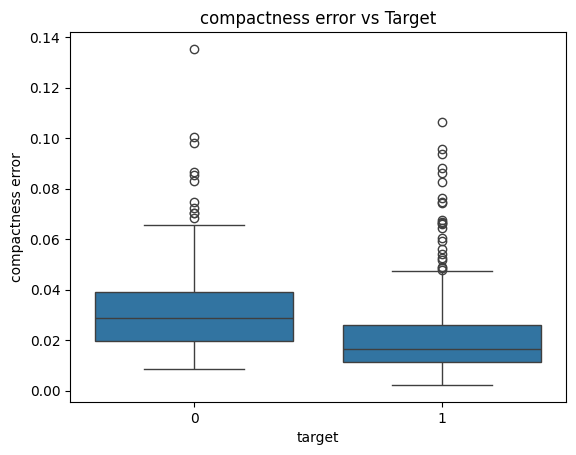

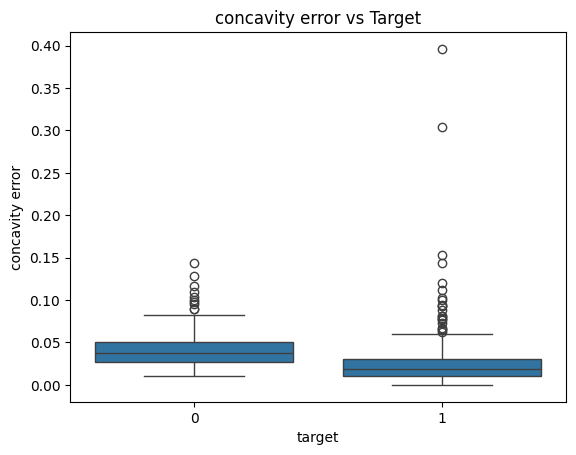

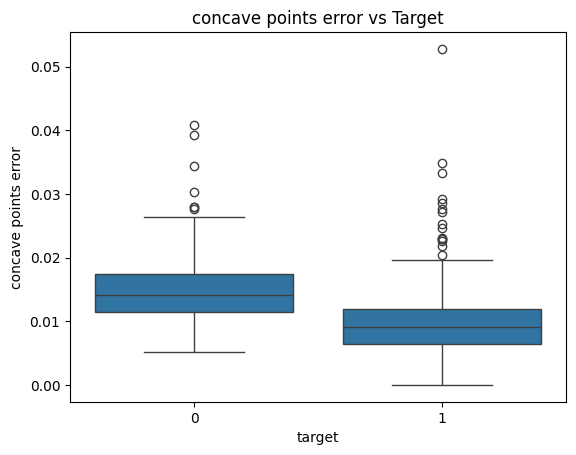

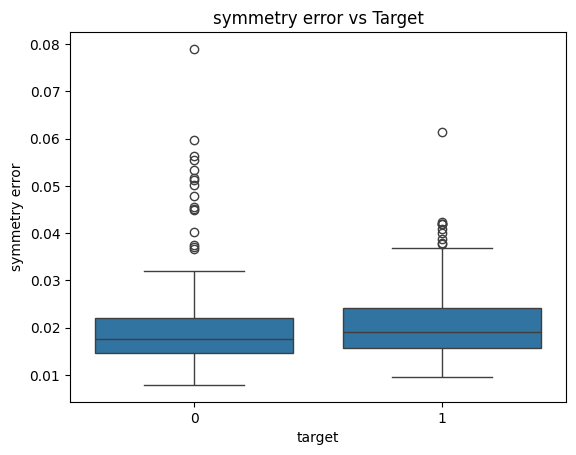

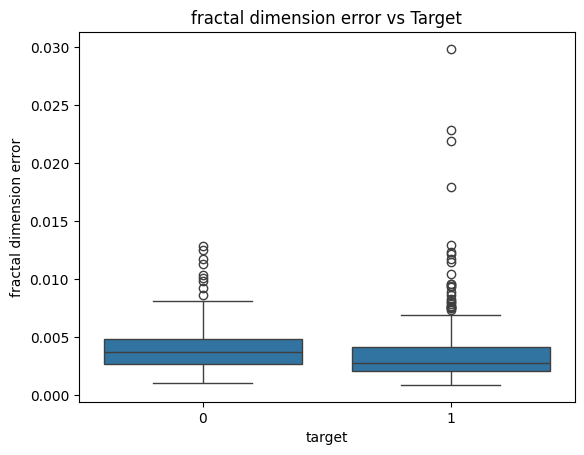

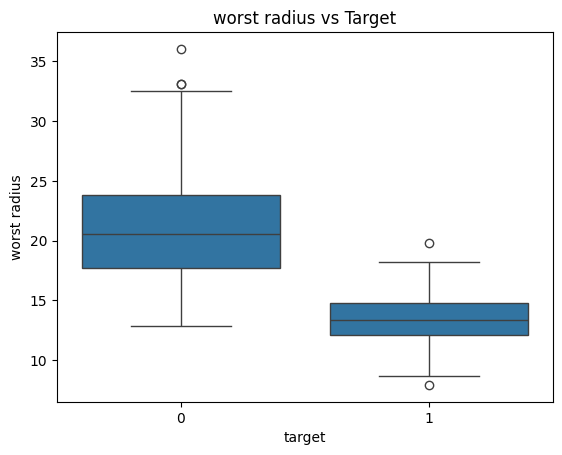

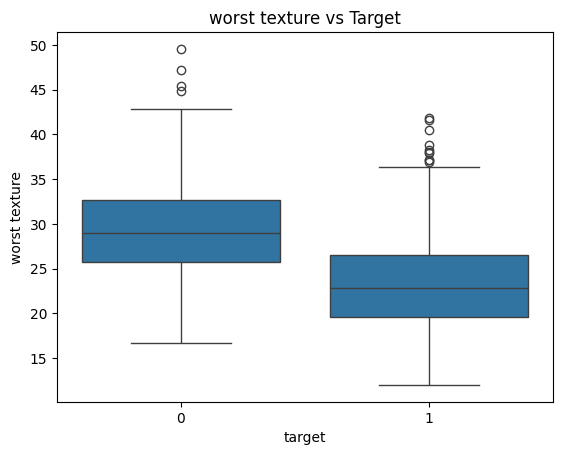

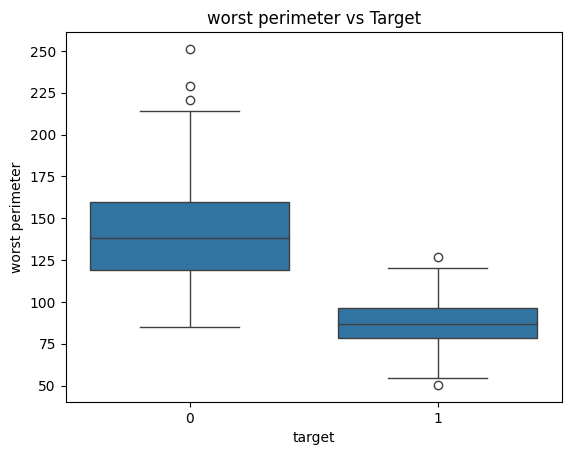

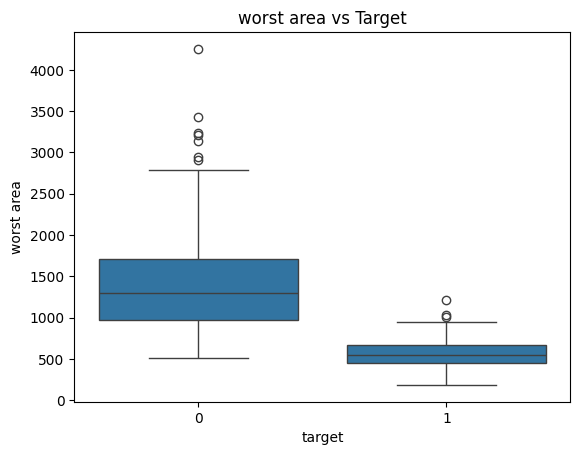

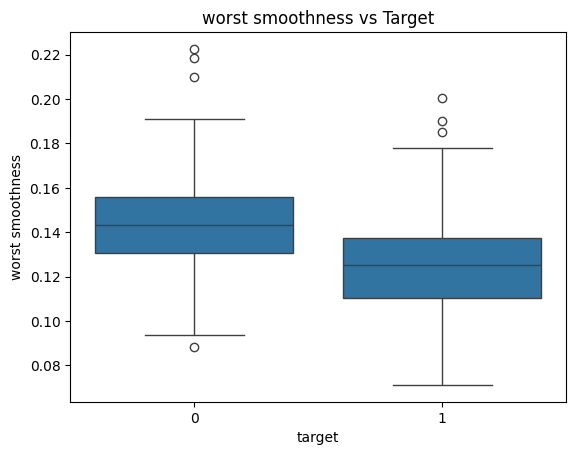

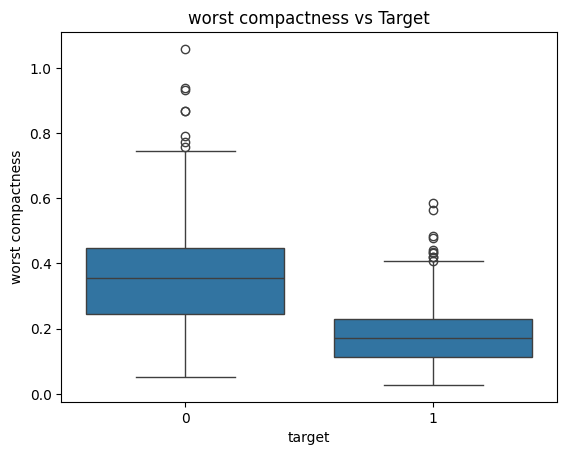

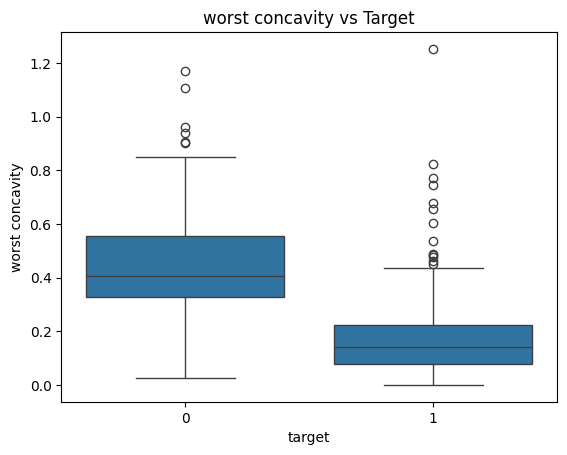

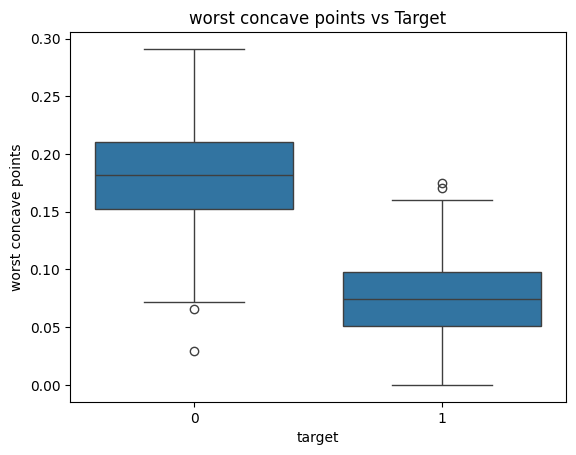

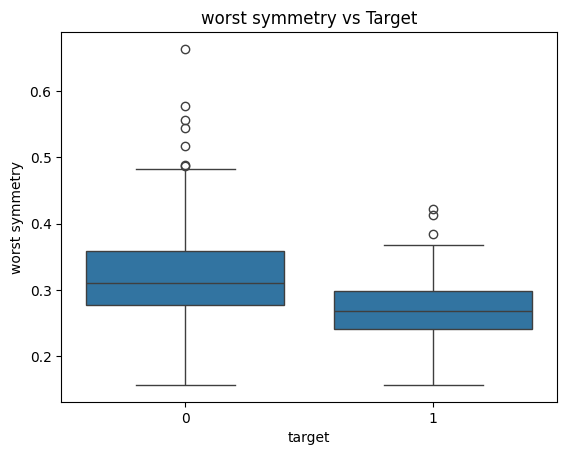

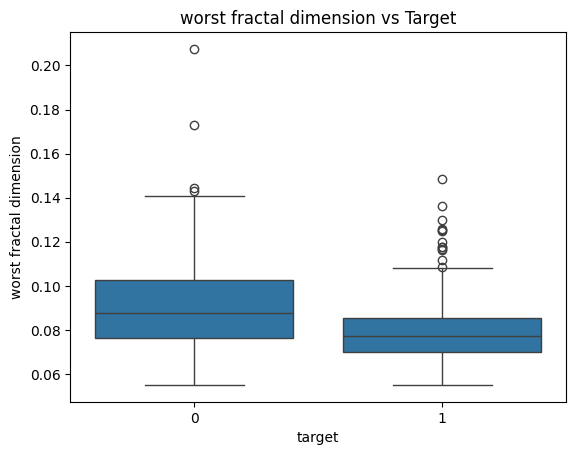

In [15]:
# Relationships between the characteristics and the target variable are shown
for feature in df.columns[:-1]:
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
    plt.show()



#### **Data preparation**

In [16]:
def prepare_data(X, y):
    """
    Prepares the data for model training.

    Arguments:
    X -- feature matrix
    y -- label vector

    Returns:
    X_train, X_test -- training and test sets (features).
    y_train, y_test -- training and test sets (labels)
    """


    # 1. Split data into training and test sets.


    # 2. Scale the features


    # Split the data
    X = df.drop('target', axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

    #data is scaled
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test


In [17]:
X_train_scaled, X_test_scaled, Y_train, Y_test = prepare_data(X, y)

#### **Sigmoid function**
Implementing sigmoid function

In [18]:
def sigmoid(z):
    """
    Calcula la función sigmoide de z.

    Arguments:
    z -- Un escalar o array de numpy

    Return:
    s -- sigmoid(z)
    """

    s = 1 / (1 + np.exp(-z))

    return s

#### **Loss Function**

In [19]:
# GRADED FUNCTION: binary_cross_entropy
def binary_cross_entropy(y_true, y_pred):
    """
    Calculate the binary cross-entropy loss.

    Arguments:
    y_true -- true labels
    y_pred -- model predictions

    Return:
    loss -- loss value
    """

    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


    return loss

#### **logistic Regression Model**

In [20]:

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=100):
        """
        Initializes the LogisticRegression class.

        Arguments:
        learning_rate -- learning rate for gradient descent.
        iterations -- number of iterations for training
        """

        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        """
        Train the logistic regression model.

        Arguments:
        X -- matrix of training features
        y -- vector of training labels
        """

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.iterations):
            # linear combination
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # parameter update
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and print loss every 100 iterations
            if iteration % 100 == 0:
                loss = binary_cross_entropy(y, y_pred)
                print(f"Iteration {iteration}, Loss: {loss}")


    def predict(self, X):
        """
        Make predictions using the trained model.

        Argument:
        X -- feature matrix to perform predictions.

        Return:
        y_pred -- model predictions
        """


        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred > 0.5).astype(int)


#### **Model Training and Evaluation**
Train the model using the training data, then visualize the loss during training and evaluate the model using the test set. Discuss the results in depth.

In [21]:
"""
Train the logistic regression model and evaluate its performance.
"""


# 1. Create an instance of the model
# 2. Train the model
# 3. Visualize the loss during training
# 4 Make predictions on test set
# 5. Calculate and return accuracy
# 6 Visualize the confusion matrix


# Create instance and train the model (here the loss is visualized)
model = MyLogisticRegression(learning_rate=0.1, iterations=1500)
model.fit(X_train_scaled, Y_train)

# Model information
model.weights
model.bias


import numpy as np
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import plotly.graph_objects as go


# predictions
Y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# precision, recall, y F1 score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm_fig = px.imshow(cm, text_auto=True, color_continuous_scale='Blues',
                   labels=dict(x="Predicted", y="Actual", color="Count"),
                   x=['Class 0', 'Class 1'],
                   y=['Class 0', 'Class 1'])
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

'''
Regarding the results, we have a very accurate model, with accuracy: 0.98, Precision: 0.99, Recall: 0.99, F1 Score: 0.99.
it is possible that the model has been over-fitted, so the implementation of logistic regression from SKlearn and Tensorflow is shown below.
'''


Iteration 0, Loss: 0.6931471805599453
Iteration 100, Loss: 0.1056105719618961
Iteration 200, Loss: 0.08697476828026082
Iteration 300, Loss: 0.0785961404815031
Iteration 400, Loss: 0.07349715884464171
Iteration 500, Loss: 0.06994555051787311
Iteration 600, Loss: 0.06727603669831593
Iteration 700, Loss: 0.06516966942735981
Iteration 800, Loss: 0.06345080006959485
Iteration 900, Loss: 0.06201302753567006
Iteration 1000, Loss: 0.06078727692467753
Iteration 1100, Loss: 0.05972629668688033
Iteration 1200, Loss: 0.05879641972562072
Iteration 1300, Loss: 0.057972864374841414
Iteration 1400, Loss: 0.05723689785352618
Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


'\nRegarding the results, we have a very accurate model, with accuracy: 0.98, Precision: 0.99, Recall: 0.99, F1 Score: 0.99.\nit is possible that the model has been over-fitted, so the implementation of logistic regression from SKlearn and Tensorflow is shown below.\n'

Now the same model will be performed using Sklearn default Logistic regression

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Select only the first two features for visualization (e.g., mean radius and mean texture)
X = data.data[:, :2]
y = data.target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler (mean = 0, std = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))

# Reshape predictions to match the shape of the mesh grid
Z = Z.reshape(xx.shape)


# Print the model's accuracy on the test set
print(f"Model accuracy: {model.score(X_test_scaled, y_test):.2f}")


Model accuracy: 0.90


In [23]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = px.imshow(cm, text_auto=True, color_continuous_scale='Blues',
                   labels=dict(x="Predicted", y="Actual", color="Count"),
                   x=['Class 0', 'Class 1'],
                   y=['Class 0', 'Class 1'])
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()

Now the same model will be performed using tensorflow and keras

---



In [28]:
# Import necessary libraries
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import plotly.express as px
import numpy as np

# Load a binary classification dataset (example: breast cancer dataset)
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the logistic regression model (using an Input layer explicitly)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # Preferred way
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predict class labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_fig = px.imshow(cm, text_auto=True, color_continuous_scale='Blues',
                   labels=dict(x="Predicted", y="Actual", color="Count"),
                   x=['Class 0', 'Class 1'],
                   y=['Class 0', 'Class 1'])
cm_fig.update_layout(title='Confusion Matrix')
cm_fig.show()



Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7375 - loss: 0.5500
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7819 - loss: 0.4976
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8344 - loss: 0.4432
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8311 - loss: 0.4275
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8765 - loss: 0.3748
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8523 - loss: 0.3689
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8890 - loss: 0.3157 
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9108 - loss: 0.3005
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8778 - loss: 0.3121  
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9190 - loss: 0.2743
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9122 - loss: 0.3030 
Loss: 0.28735920786857605
Accuracy: 0.9210526347160339
4/4 ━━━━━━━━━━━━━━━━━━━━